<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

%matplotlib inline

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [9]:
df = pd.read_csv('sacramento_real_estate_transactions.csv')

In [3]:
# A:

In [10]:
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [11]:
df.shape

(985, 12)

In [12]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [14]:
round(df.describe(),1)

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.0,985.0,985.0,985.0,985.0,985.0,985.0
mean,95750.7,2.9,1.8,1312.9,233716.0,38.4,-121.2
std,85.2,1.3,0.9,856.1,139088.8,5.1,5.1
min,95603.0,0.0,0.0,-984.0,-210944.0,-121.5,-121.6
25%,95660.0,2.0,1.0,950.0,145000.0,38.5,-121.4
50%,95762.0,3.0,2.0,1304.0,213750.0,38.6,-121.4
75%,95828.0,4.0,2.0,1718.0,300000.0,38.7,-121.3
max,95864.0,8.0,5.0,5822.0,884790.0,39.0,38.7


In [16]:
df.isnull().any()

street       False
city         False
zip          False
state        False
beds         False
baths        False
sq__ft       False
type         False
sale_date    False
price        False
latitude     False
longitude    False
dtype: bool

In [34]:
(df == 0).sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [ ]:
# There are zeros for beds, baths, and sq__ft

In [22]:
# Bed are 0
df[df.beds == 0].head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965


In [23]:
# Where beds 
df[(df.sq__ft == 0) & (df.beds != 0)].head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
132,3020 RICHARDSON CIR,EL DORADO HILLS,95762,CA,3,2,0,Residential,Wed May 21 00:00:00 EDT 2008,352000,38.691299,-121.081752
154,6030 PALERMO WAY,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,600000,38.672761,-121.050378
155,4070 REDONDO DR,EL DORADO HILLS,95762,CA,4,3,0,Residential,Wed May 21 00:00:00 EDT 2008,606238,38.666807,-121.064830
157,315 JUMEL CT,EL DORADO HILLS,95762,CA,6,5,0,Residential,Wed May 21 00:00:00 EDT 2008,830000,38.669931,-121.059580
223,2778 KAWEAH CT,CAMERON PARK,95682,CA,3,1,0,Residential,Tue May 20 00:00:00 EDT 2008,201000,38.694052,-120.995589


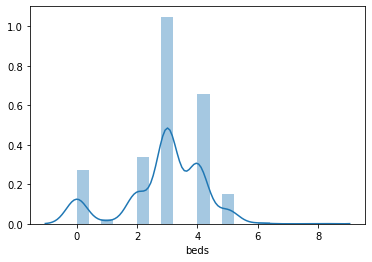

In [26]:
sns.distplot(df.beds)

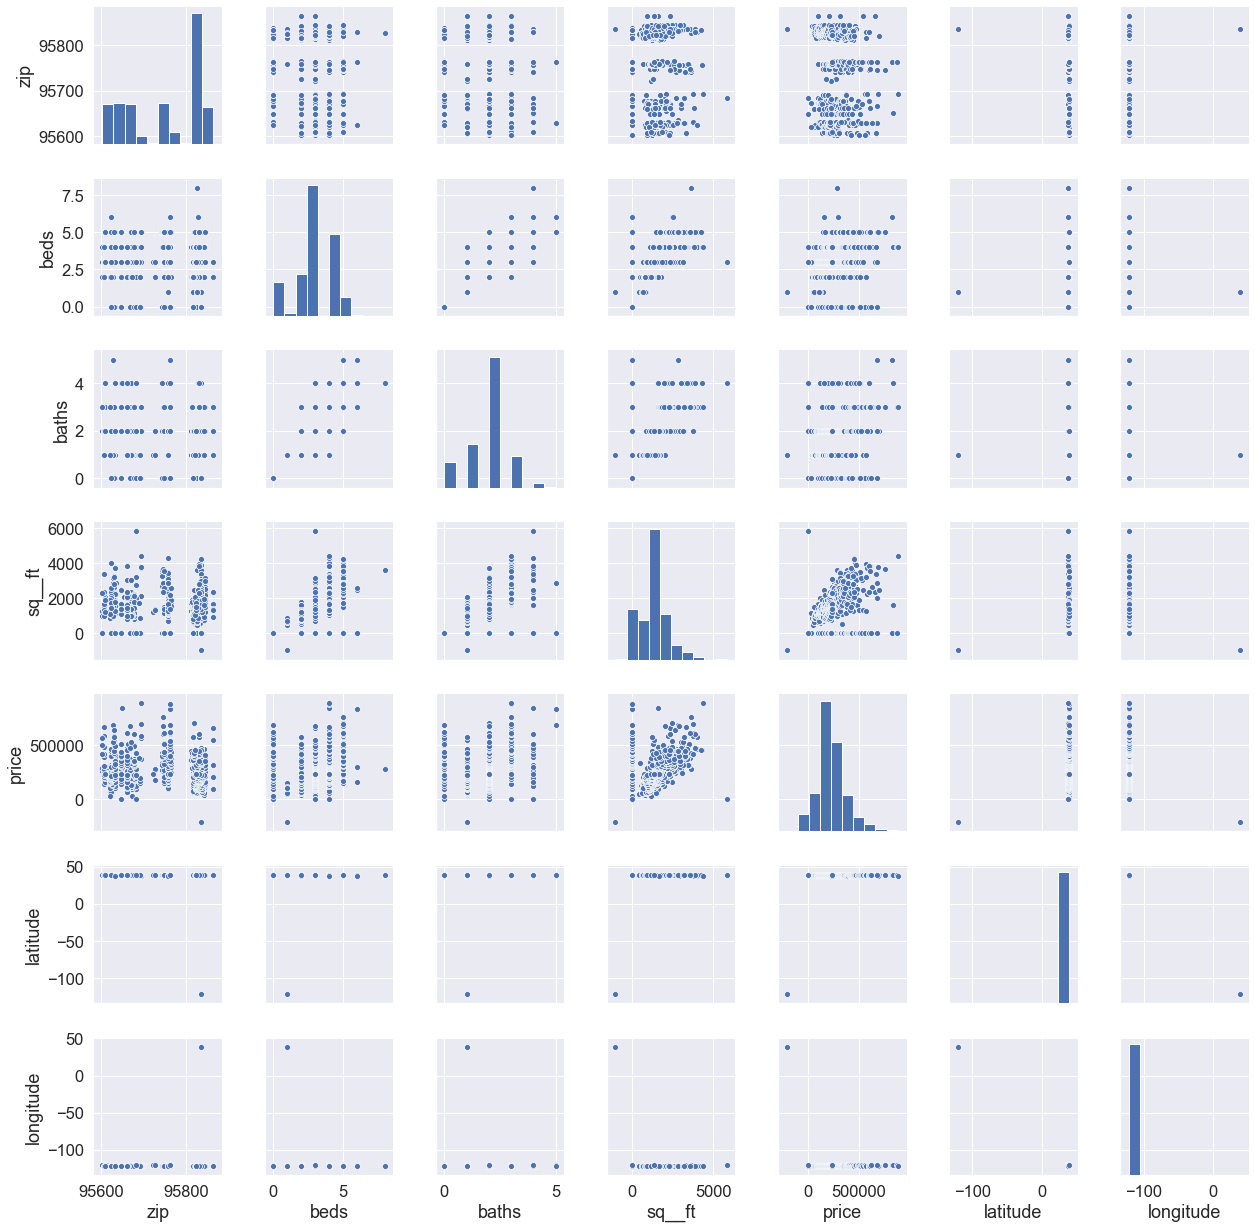

In [28]:
sns.set(font_scale=1.5)
sns.pairplot(df);

In [32]:
df[df == 0] = np.nan

In [44]:
df.beds = df.beds.fillna(df.beds.mean())
df.baths = df.baths.fillna(df.baths.mean())
df.sq__ft = df.sq__ft.fillna(df.sq__ft.mean())

In [45]:
df[['beds','baths','sq__ft']].isnull().sum()

beds      0
baths     0
sq__ft    0
dtype: int64

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

In [4]:
# A

In [75]:
pcorr = df.corr()['price'].sort_values(ascending=False)
pcorr

price        1.000000
sq__ft       0.552011
baths        0.467799
beds         0.406778
latitude     0.100806
longitude   -0.094262
zip         -0.095918
Name: price, dtype: float64

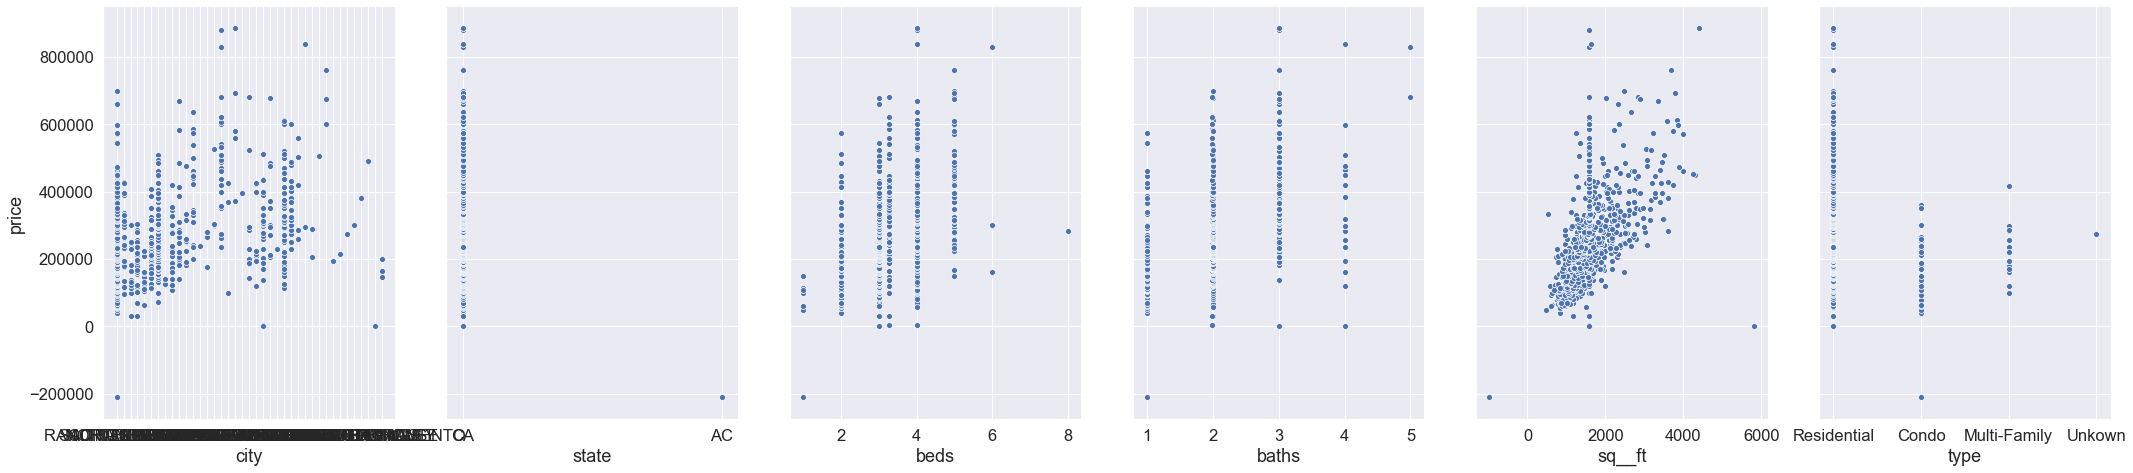

In [56]:
feature_cols = ['city', 'state', 'beds', 'baths', 'sq__ft', 'type']

sns.set(font_scale=1.5, style="darkgrid")
sns.pairplot(df, x_vars=feature_cols, y_vars='price', height=7, aspect=0.7);

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [76]:
# A: sq__ft because it has the highest correlation and a strong linear relationship

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [112]:
# Create a feature matrix X
X = df.sq__ft.values.reshape(-1, 1)

# Create a response array
y = df.price.values.reshape(-1, 1)

In [113]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [114]:
print(X.shape)
print(y.shape)

(985, 1)
(985, 1)


In [115]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
print(linreg.intercept_)
print(linreg.coef_)

[33306.92940679]
[[126.14428564]]


### 6. Interpret the intercept. Interpret the slope.

In [120]:
# A: 
# If a house had 0 square feet, it would cost $33,306. 
# For every 1ft increase in sq__ft the house costs an additional $126

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [8]:
# A:

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [9]:
# A: